## **Task 1 - Preguntas Teóricas**

**1. Explique con sus propias palabras, qué son los grafos computaciones y cuál es su importancia para el cálculo de gradientes en aplicaciones como backpropagation**

La definición de grafos computación son representaciones visuales o abstractas para las operaciones matemáticas las cuales muestran cómo los datos fluyen a través de diferentes nodos, los que representan operaciones, y con las cuales se puede llegar a producir un resultado final. Estos grafos son importantes en muchas aplicaciones que se utilizan hoy en día, sin embargo en el contexto del cálculo de gradientes los grafos se usan para visualizar y organizar las operaciones necesarias para realizar los cálculos de gradientes de una manera mucho más eficiente.

**2. Detalle cuales son los componentes y pasos que conforman una red neuronal. Con esto en mente, ¿cómo mejoraría el perceptrón que hizo en el laboratorio pasado?**

<u>Componentes de una red neuronal:</u>

- _Nodos:_ Son las unidades básicas de procesamiento de una red neuronal, en las cuales cada una recibe una entrada, se hace un cálculo y se produce una salida.

- _Pesos:_ También conocido como las conexiones de los nodos, estos representan la influencia que una nodo tiene sobre otro, la cual se va ajustando durante el entrenamiento para poder mejorar el rendimiento de la red.

- _Capas:_ Estas son agrupaciones de nodos que procesan la información en conjunto. Generalmente existen capas de entrada, ocultas y de salida.
    
- _Funciones de activación:_ Son funciones matemáticas aplicadas a la salida de cada neurona las cuales inducen no linealidad en la red y permiten que esta aprenda y modele relaciones más complejas.


<u>Pasos del entrenamiento de una red neuronal:</u>

- _Inicialización de pesos:_ Estos se inicializan de forma aleatoria mediante un método específico.

- _Forward pass:_ Capa por capa, se calculan las salidas de las neuronas mediante los pesos actuales y las funciones de activación.

- _Cálculo de pérdida:_ Aquí se compara la salida calculada con la deseada mediante una función de pérdida.

- _Backpropagation:_ Se calculan los gradientes de la función de pérdida con respecto a los pesos de la red, a la vez que las gradientes se propagan hacia atrás mediante la regla de la cadena.

- _Actualización de pesos:_ Los pesos de la red se ajustan para reducir la pérdida mediante un algoritmo de optimización.


<u>Mejora del perceptrón:</u>

Las capas ocultas de una red neuronal permiten que estas puedan aprender representaciones más complejas de un conjunto de datos, así como también permite modelar relaciones no lineales, así mismo, reemplazar la función de activación lineal de un perceptrón por una sigmoidal o una tangente hiperbólica puede llegar a mejorar el rendimiento. A pesar de que no siempre es más, sin embargo, generar un conjunto de datos de entrenamiento más grande puede ayudar a la capacidad de generalización y al rendimiento del modelo, siempre teniendo cuidado de no caer en un overfitting, también variar las configuraciones de los hiperparámetros puede mejorar el resultado del modelo. Todas estas estrategias pueden llegar a mejorar el perceptrón realizado anteriormente, sin embargo no deben aplicarse religiosamente todas, sino que deben ser evaluadas y seleccionadas según el caso.

**3. Investigue y explique cómo se selecciona el valor K usando el método de la silueta para el algoritmo de K-Means. Explique las fórmulas (ecuaciones) que lo componen así como las asumpciones, si hay.**

El método de la silueta se refiere al determinar el número óptimo de clústers en el algoritmo. Este se basa en evaluar la cohesión y separación de los clústers para diferentes cantidades de ellos para así seleccionar el valor que maximice la cohesión y minimice la separación.

<u>Fórmula de la silueta:</u>

Para cada punto de datos i en el conjunto de datos se calcula la cohesión entre clústers como la distancia promedio entre en punto y todos los demás puntos dentro del mismo clúster. Luego se calcula la separación entre clústers como la distancia promedio entre el punto y todos los puntos del clúster más cercano. Por último se calcula el valor de la silueta para el punto como si=(bi - ai) / max(ai , bi)

<u>Asunciones:</u>

- Mientras más cercanos sean los puntos dentro de un clúster, se tendrá una alta cohesión intraclúster.

- Cuanto más lejos estén los clústers de uno del otro se tendrá una mayor separación interclúster.

- El valor de silueta puede variar entre -1 y 1, valor el cual, mientras más cercano a 1 sea indica que está bien clasificado, mientras que si es más cercano a -1 indica que el punto debería pertenecer a un clúster distinto porque puede estar mal clasificado, por su parte, si el valor es, o es cercano, a 0, el punto analizado está cerca del límite de dos clústers.

Entendiendo cómo se calculan los valores de silueta para los puntos, el valor de K debe seleccionarse para que se maximice el valor de Sk, lo que significa que se debe buscar que los clústers que se tengan proporcionen una buena cohesión y una separación de los clústers adecuada, es decir, se tiene que tener una alta coherencia y poca superposición de los clústers.

**4. Investigue sobre Principal Component Analysis (PCA) y responda respecto a algoritmos como K-Means:**

<u>a. ¿Cómo podría ayudarle a mejorar la calidad de sus clusters cuando se usa K-Means?</u>

Al reducir la dimensionalidad de los datos y conservar la mayor parte de la variación de los datos antes de aplicar K-Means se elimina el ruido que pueda haber en los datos, así como se destacan las características más importantes, lo que deriva en una producción de mejores clústers. Al mismo tiempo, con esta reducción de dimensionalidad los clústers resultantes tienen una visualización e interpretación más sencilla y entendible.  K-Means también puede dar pesos desproporcionados a ciertas variables en el proceso de agrupamiento si hay variables altamente correlacionadas, por lo que eliminar esta multicolinealidad al transformar variables puede capturar mejor la estructura subyacente de los datos. 


## **Task 2**

### **Task 2.1 - K-Means y Segmentación de Clientes de Banco**

### Exploración de datos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

df = pd.read_csv('bank_transactions.csv')
df = df.sample(n=10000,random_state = 42)
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
892845,T892846,C5725279,8/9/84,M,JASPUR,84447.82,7/9/16,183210,11858.0
444994,T444995,C4588538,2/1/94,M,GURGAON,12549.49,16/8/16,161300,250.0
614896,T614897,C2416476,14/11/90,M,NEW DELHI,33607.65,26/8/16,102007,3360.0
457036,T457037,C5940151,15/9/90,M,HYDERABAD,38238.86,21/8/16,110438,250.0
997441,T997442,C5922989,27/11/88,M,PURBO MEDINIPUR,9506.85,14/9/16,90810,33.0
...,...,...,...,...,...,...,...,...,...
182169,T182170,C5641322,16/6/85,M,AHMEDABAD,28773.30,9/8/16,94328,50.0
707411,T707412,C3112642,13/5/90,M,NOIDA,23.83,30/8/16,114104,100.0
356446,T356447,C2032686,1/2/88,F,DELHI,4362.27,14/8/16,143956,545.0
266529,T266530,C2732764,27/9/89,M,PUNE,14584.36,3/9/16,121639,500.0


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 892845 to 111904
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            10000 non-null  object 
 1   CustomerID               10000 non-null  object 
 2   CustomerDOB              9966 non-null   object 
 3   CustGender               9991 non-null   object 
 4   CustLocation             10000 non-null  object 
 5   CustAccountBalance       9981 non-null   float64
 6   TransactionDate          10000 non-null  object 
 7   TransactionTime          10000 non-null  int64  
 8   TransactionAmount (INR)  10000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 781.2+ KB


In [3]:
df['CustGender'].unique()
df[df['CustGender']=='T'] # solamente hay un dato. 


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)


In [4]:
df.drop(df[df['CustGender']=='T'].index,inplace=True)


In [5]:
df.isnull().sum()


TransactionID               0
CustomerID                  0
CustomerDOB                34
CustGender                  9
CustLocation                0
CustAccountBalance         19
TransactionDate             0
TransactionTime             0
TransactionAmount (INR)     0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()


TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [7]:
# 'CustomerDOB' a datetime 
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

# 'TransactionDate' a datetime 
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [8]:
# Calculando la edad de cada ciente 
df['CusAge'] = (df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year)
df['CusAge'].value_counts()
df['CusAge'] = df['CusAge'].abs()
df['CusAge'] 


892845    32
444994    22
614896    26
457036    26
997441    28
          ..
182169    31
707411    26
356446    28
266529    27
111904    23
Name: CusAge, Length: 9938, dtype: int64

In [9]:
df.loc[df['CusAge'] > 100, 'CusAge']

778232    216
320469    216
865233    216
125722    216
976149    216
         ... 
235811    216
213641    216
928067    216
297358    216
35300     216
Name: CusAge, Length: 527, dtype: int64

In [10]:
df = df.loc[df['CusAge'] <= 100]
df.loc[df['CusAge'] > 100, 'CusAge']

Series([], Name: CusAge, dtype: int64)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9411 entries, 892845 to 111904
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            9411 non-null   object        
 1   CustomerID               9411 non-null   object        
 2   CustomerDOB              9411 non-null   datetime64[ns]
 3   CustGender               9411 non-null   object        
 4   CustLocation             9411 non-null   object        
 5   CustAccountBalance       9411 non-null   float64       
 6   TransactionDate          9411 non-null   datetime64[ns]
 7   TransactionTime          9411 non-null   int64         
 8   TransactionAmount (INR)  9411 non-null   float64       
 9   CusAge                   9411 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 808.8+ KB


In [12]:
# Calcular el Gasto Total por Cliente
total_spent_per_customer = df.groupby('CustomerID')['TransactionAmount (INR)'].sum().reset_index(name='TotalSpent')
total_spent_per_customer

,CustomerID,TotalSpent
0,C1010243,253.00
1,C1010655,712.00
2,C1010666,497.00
3,C1010923,117.00
4,C1011343,420.00
...,...,...
9389,C9078328,120.00
9390,C9078383,569.05
9391,C9083325,1216.50
9392,C9090538,100.00


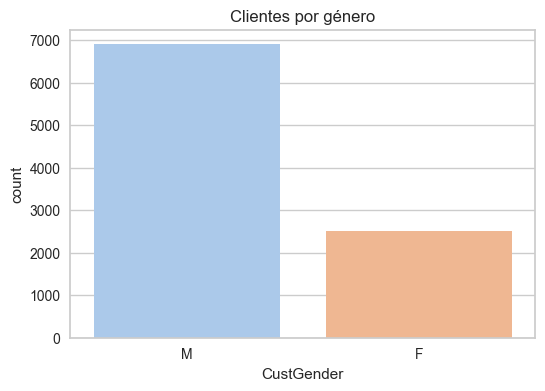

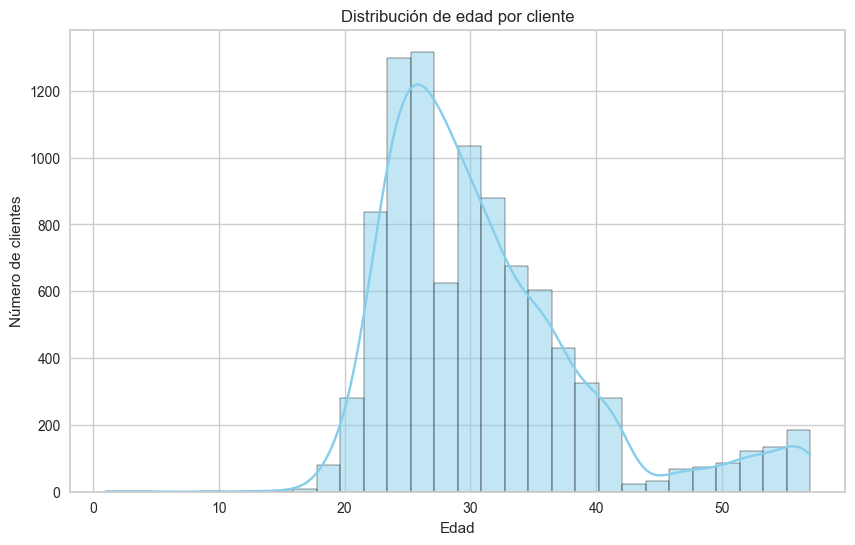

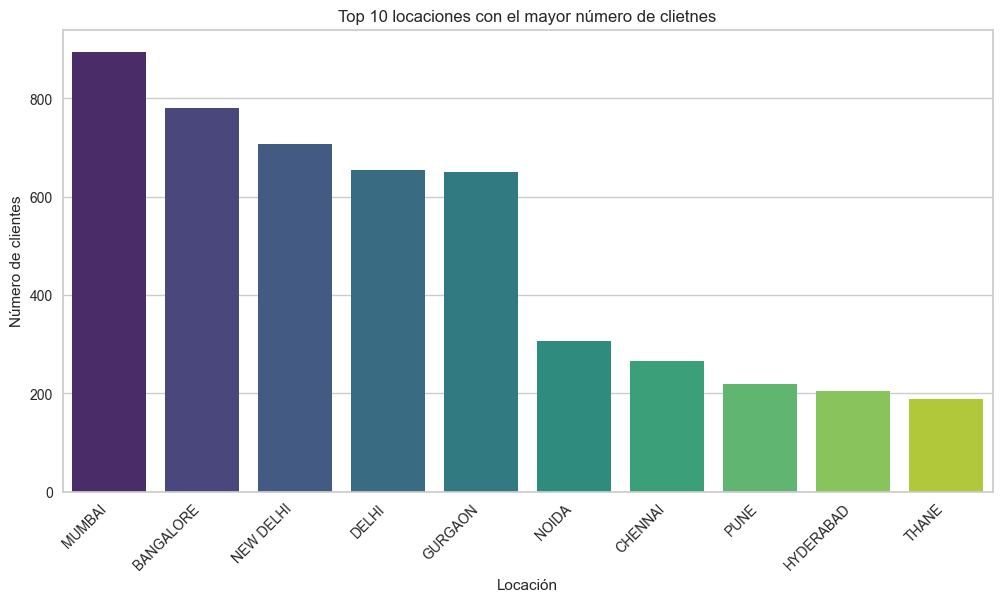

In [13]:
df1 = df.copy()
# Distribución de clientes por género
plt.figure(figsize=(6, 4))
sns.countplot(x='CustGender',data = df1, palette='pastel')
plt.title('Clientes por género')
plt.show()

# Edad de clientes
plt.figure(figsize=(10, 6))
sns.histplot(df1['CusAge'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de edad por cliente')
plt.xlabel('Edad')
plt.ylabel('Número de clientes')
plt.show()

# Locación del número de clientes 
location_counts = df1['CustLocation'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Top 10 locaciones con el mayor número de clietnes')
plt.xlabel('Locación')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45, ha='right')
plt.show()

### Codificación y Escaler de datos

In [14]:
from sklearn.preprocessing import LabelEncoder

# Columnas no útiles para el análisis
df1.drop(columns=['TransactionID', 'CustomerDOB', 'TransactionTime'], axis=1, inplace=True)

encoder = LabelEncoder()
df1['CustGender'] = encoder.fit_transform(df['CustGender'])
df1['CustLocation'] = encoder.fit_transform(df['CustLocation'])
df1

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CusAge
892845,C5725279,1,458,84447.82,2016-07-09,11858.0,32
444994,C4588538,1,393,12549.49,2016-08-16,250.0,22
614896,C2416476,1,741,33607.65,2016-08-26,3360.0,26
457036,C5940151,1,432,38238.86,2016-08-21,250.0,26
997441,C5922989,1,846,9506.85,2016-09-14,33.0,28
...,...,...,...,...,...,...,...
182169,C5641322,1,17,28773.30,2016-09-08,50.0,31
707411,C3112642,1,750,23.83,2016-08-30,100.0,26
356446,C2032686,0,257,4362.27,2016-08-14,545.0,28
266529,C2732764,1,841,14584.36,2016-03-09,500.0,27


In [15]:
df1.drop('CustomerID', axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9411 entries, 892845 to 111904
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CustGender               9411 non-null   int32         
 1   CustLocation             9411 non-null   int32         
 2   CustAccountBalance       9411 non-null   float64       
 3   TransactionDate          9411 non-null   datetime64[ns]
 4   TransactionAmount (INR)  9411 non-null   float64       
 5   CusAge                   9411 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1)
memory usage: 441.1 KB


In [16]:
scaler = StandardScaler()
# escalamiento de variables numericas
numerical = ['CustAccountBalance', 'TransactionAmount (INR)', 'CusAge']
df1[numerical] = scaler.fit_transform(df1[numerical])
df1.head()

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CusAge
892845,1,458,-0.025386,2016-07-09,1.822149,0.129925
444994,1,393,-0.216860,2016-08-16,-0.217489,-1.103032
614896,1,741,-0.160780,2016-08-26,0.328968,-0.609849
457036,1,432,-0.148446,2016-08-21,-0.217489,-0.609849
997441,1,846,-0.224963,2016-09-14,-0.255618,-0.363258


### **Task 2.1.1 - K-Means y Segmentación de Clientes de Banco**

### K-Means sin librerías

### K-Means con librerías

c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

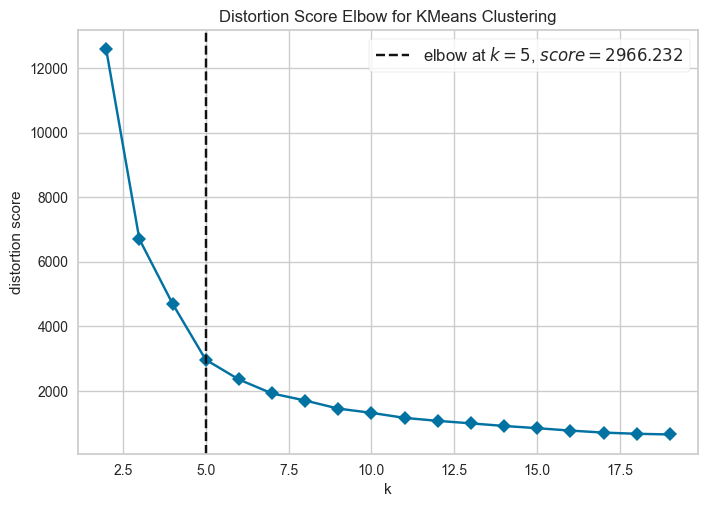

c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

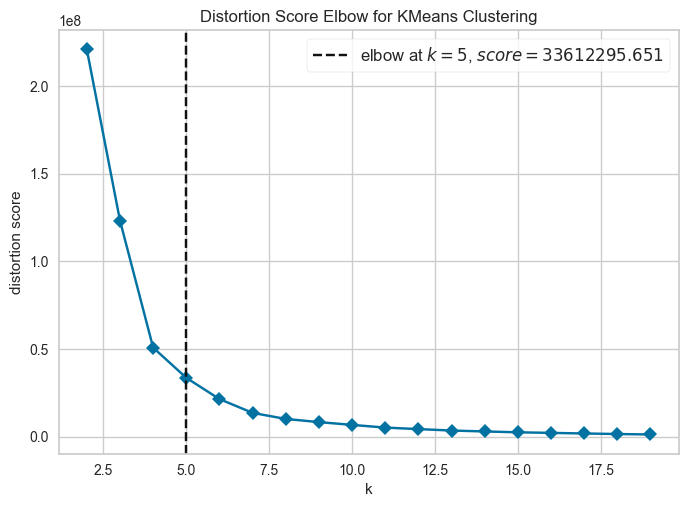

In [17]:
import random
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

df_km = df1.copy()

# Variables de segmentación
X = df_km[['CusAge', 'TransactionAmount (INR)']].values
Y = df_km[['CustLocation', 'TransactionAmount (INR)']].values


#  KMeans clustering y método del codo
def perform_elbow_method(X, k_range, title):
    model = KMeans(init='k-means++', random_state=42)
    visualizer = KElbowVisualizer(model, k=k_range, timings=False)
    visualizer.fit(X)
    plt.title(title)
    visualizer.show()
    
perform_elbow_method(X, k_range=(2, 20), title='Método del codo para el cluster de la edad de clientes')
perform_elbow_method(Y, k_range=(2, 20), title='Método del codo para el cluster de la locación de clientes ')

In [18]:
# Cluster KMean  y centroides
def kmeans_clustering(X, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    cluster_centers = kmeans.cluster_centers_
    return cluster_labels, cluster_centers

x_cluster_labels, x_cluster_centers = kmeans_clustering(X, num_clusters=6)
y_cluster_labels, y_cluster_centers = kmeans_clustering(Y, num_clusters=7)

df_km['cluster_age'] = x_cluster_labels
df_km['cluster_location'] = y_cluster_labels

# Add centroids to the DataFrame
df_km['cen_xx'] = df_km.cluster_age.map({i: x_cluster_centers[i][0] for i in range(6)})
df_km['cen_xy'] = df_km.cluster_age.map({i: x_cluster_centers[i][1] for i in range(6)})
df_km['cen_yx'] = df_km.cluster_location.map({i: y_cluster_centers[i][0] for i in range(7)})
df_km['cen_yy'] = df_km.cluster_location.map({i: y_cluster_centers[i][1] for i in range(7)})

df1.head()

c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CusAge
892845,1,458,-0.025386,2016-07-09,1.822149,0.129925
444994,1,393,-0.216860,2016-08-16,-0.217489,-1.103032
614896,1,741,-0.160780,2016-08-26,0.328968,-0.609849
457036,1,432,-0.148446,2016-08-21,-0.217489,-0.609849
997441,1,846,-0.224963,2016-09-14,-0.255618,-0.363258


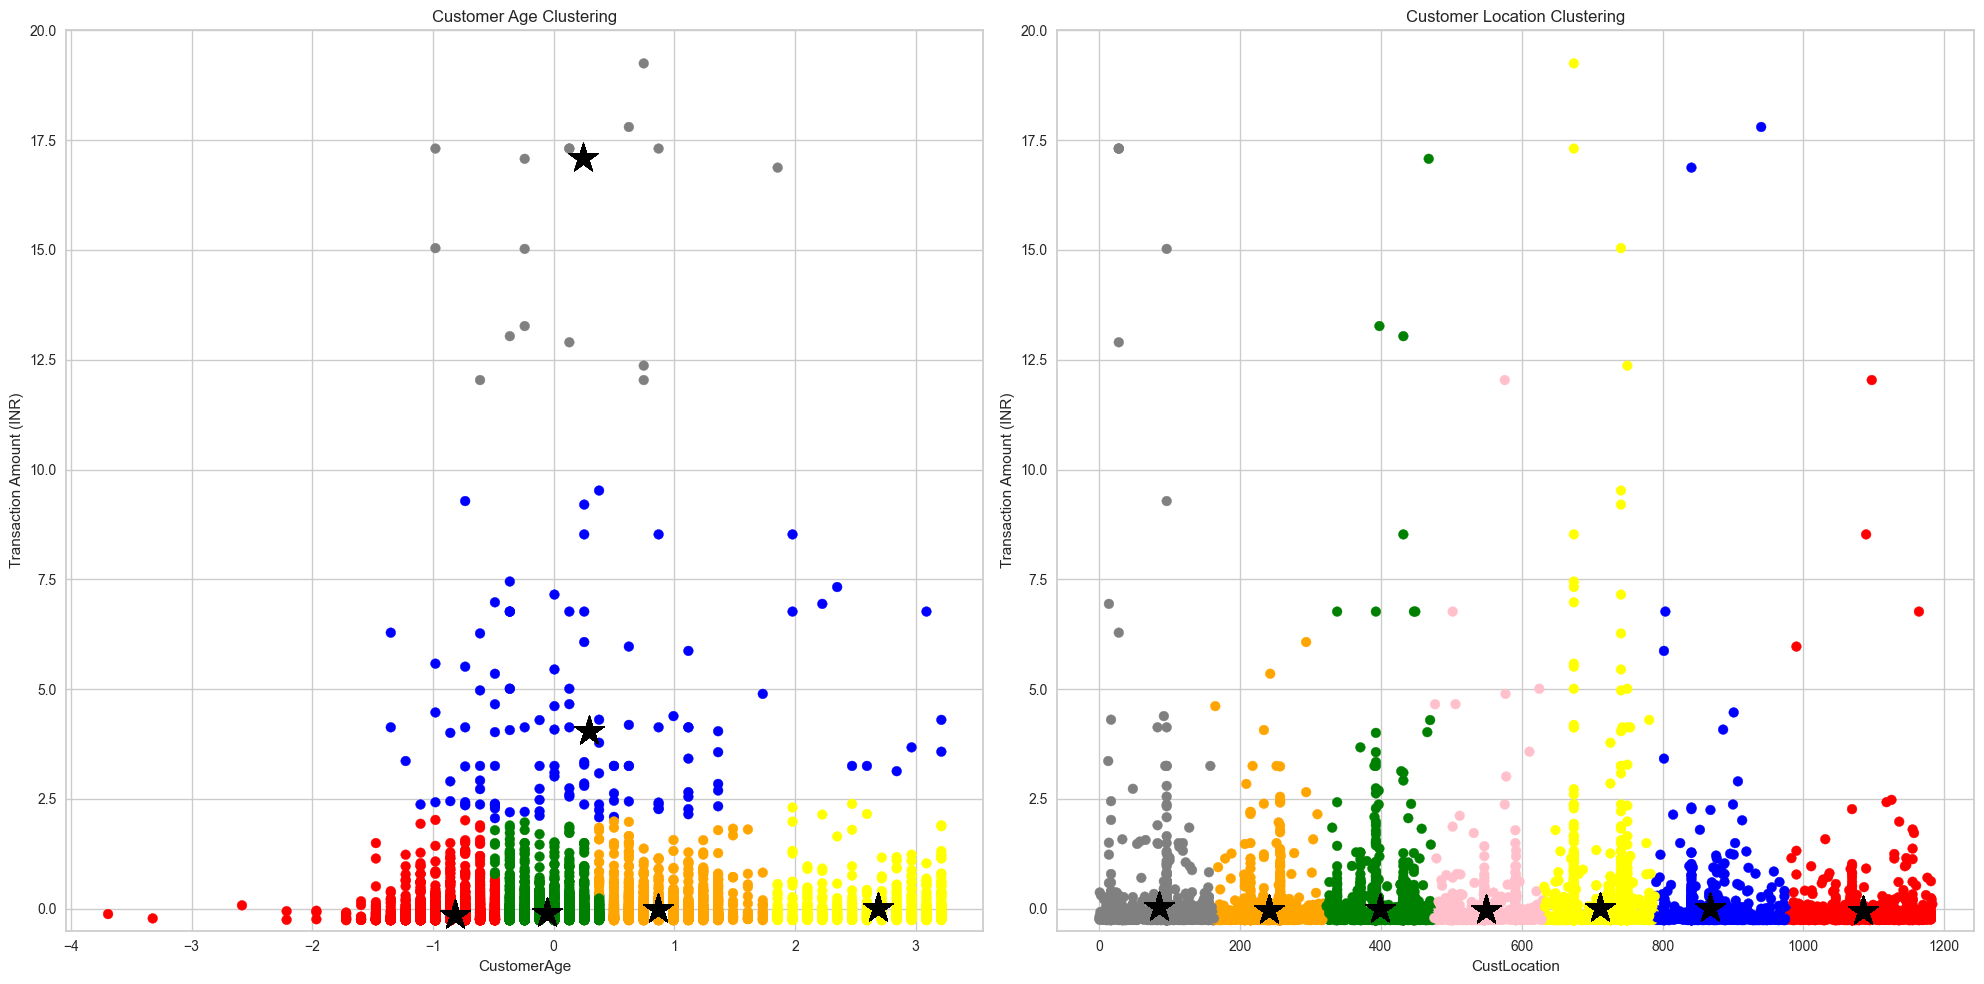

In [19]:
colors_X = ['red', 'yellow', 'grey', 'green', 'blue', 'orange']
colors_Y = ['red', 'yellow', 'grey', 'green', 'blue', 'orange', 'pink']


df_km['color_age_km'] = df_km.cluster_age.map({i: colors_X[i] for i in range(6)})
df_km['color_location_km'] = df_km.cluster_location.map({i: colors_Y[i] for i in range(7)})

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(df_km['CusAge'], df_km['TransactionAmount (INR)'], c=df_km.color_age_km)
plt.scatter(df_km['cen_xx'], df_km['cen_xy'], marker='*', s=500, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('CustomerAge')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Age Clustering')

plt.subplot(1, 2, 2)
plt.scatter(df_km['CustLocation'], df_km['TransactionAmount (INR)'], c=df_km.color_location_km)
plt.scatter(df_km['cen_yx'], df_km['cen_yy'], marker='*', s=500, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('CustLocation')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Location Clustering')

plt.tight_layout()  
plt.show()

### Métrica de rendimiento: Silhouette

In [20]:
# Silhouette Score for cluster_age
silhouette_score_age = silhouette_score(df_km[['TransactionAmount (INR)', 'CusAge']], df_km['CusAge'])
print("Silhouette Score for cluster_age:", silhouette_score_age)

# Silhouette Score for cluster_location
silhouette_score_location = silhouette_score(df_km[['CustLocation','TransactionAmount (INR)']], df_km['cluster_location'])
print("Silhouette Score for cluster_location:", silhouette_score_location)

Silhouette Score for cluster_age: 0.10005033614124532
Silhouette Score for cluster_location: 0.686531587219179
